In [10]:
# Import libraries
import pandas as pd
import numpy as np

from tqdm import tqdm
import glob
from tabulate import tabulate

import time
import json

%run Code/plot_setup.py

%reload_ext autoreload
%autoreload 2


In [2]:
etfdata = pd.read_csv("Data/ETFdata_etfdb_complete.csv")

cols_touse = [
    'Symbol', 
    'ETF Name', 
    'Asset Class', 
    # 'Total Assets ($MM)',
    # 'Avg. Daily Share Volume (3mo)',
    'Expense Ratio', 
    # 'ESG Score',
    # 'ESG Score Peer Percentile', 
    # 'ESG Score Global Percentile', 
    # 'P/E Ratio',
    # 'Beta', 
    # 'Issuer', 
    # '# of Holdings', 
    # '% In Top 10', 
    # 'Liquidity',
    # 'Expenses', 
    'region'
]

etfdata = etfdata.loc[:, cols_touse]



# # only use Asset class: Equity
# etfdata = etfdata.loc[etfdata["Asset Class"] == "Equity"].reset_index(drop=True)


etfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         2994 non-null   object 
 1   ETF Name       2994 non-null   object 
 2   Asset Class    2994 non-null   object 
 3   Expense Ratio  2994 non-null   float64
 4   region         2734 non-null   object 
dtypes: float64(1), object(4)
memory usage: 117.1+ KB


In [3]:
# fill in missing region
etfdata["region"] = etfdata.loc[:, "region"].fillna("Undefined")

etfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         2994 non-null   object 
 1   ETF Name       2994 non-null   object 
 2   Asset Class    2994 non-null   object 
 3   Expense Ratio  2994 non-null   float64
 4   region         2994 non-null   object 
dtypes: float64(1), object(4)
memory usage: 117.1+ KB


In [11]:
# Region
tab = etfdata.value_counts("region")
tab = pd.DataFrame(tab, columns=["Count"])
tab["Ratio (%)"] = (tab["Count"]/tab["Count"].sum()) * 100

print(tabulate(tab, headers = "keys", floatfmt="0.2f", tablefmt = "latex"))
print("\n")

# Asset class
tab = etfdata.value_counts("Asset Class")
tab = pd.DataFrame(tab, columns=["Count"])
tab["Ratio (%)"] = (tab["Count"]/tab["Count"].sum()) * 100

print(tabulate(tab, headers = "keys", floatfmt="0.2f", intfmt="0.0f", tablefmt = "latex"))
print("\n")

\begin{tabular}{lrr}
\hline
 region                &   Count &   Ratio (\%) \\
\hline
 North America         & 1705.00 &       56.95 \\
 Global                &  376.00 &       12.56 \\
 Undefined             &  260.00 &        8.68 \\
 Developed Market      &  249.00 &        8.32 \\
 Emerging Asia Pacifi  &   87.00 &        2.91 \\
 Global ex-U.S         &   78.00 &        2.61 \\
 Emerging Market       &   73.00 &        2.44 \\
 Developed Asia Pacifi &   71.00 &        2.37 \\
 Developed Europe      &   39.00 &        1.30 \\
 Broad Asia            &   25.00 &        0.84 \\
 Latin America         &   15.00 &        0.50 \\
 Middle East           &    8.00 &        0.27 \\
 Africa                &    3.00 &        0.10 \\
 Emerging Europe       &    3.00 &        0.10 \\
 Frontier Market       &    2.00 &        0.07 \\
\hline
\end{tabular}


\begin{tabular}{lrr}
\hline
 Asset Class     &   Count &   Ratio (\%) \\
\hline
 Equity          & 2101.00 &       70.17 \\
 Bond            

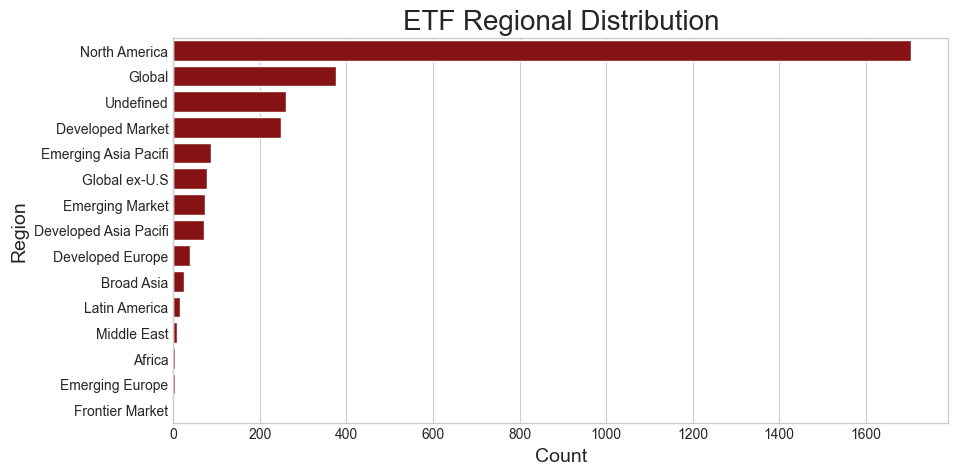

In [4]:
sns.countplot(
    y = "region",
    data = etfdata,
    order = etfdata["region"].value_counts().index,
    color=dtu_colors_hex[0]
);
plt.title(f"ETF Regional Distribution");
plt.ylabel("Region");
plt.xlabel("Count");

In [5]:
# n_top = 15
# sns.countplot(
#     y = "Issuer",
#     data = etfdata,
#     order = etfdata["Issuer"].value_counts()[:n_top].index,
#     color=dtu_colors_hex[0]
# );
# plt.title(f"Top {n_top} Issuers");
# plt.ylabel("Issuer");
# plt.xlabel("Count");

In [6]:
# g = sns.FacetGrid(data, col="Asset Class", hue = "Asset Class", col_wrap=5, sharey = False, sharex = False)
# g.map(sns.histplot, "ESG Score", bins = 15);

# sns.histplot(
#     data = etfdata,
#     x = "ESG Score",
# );
# plt.title(f"ESG Score Distribution");

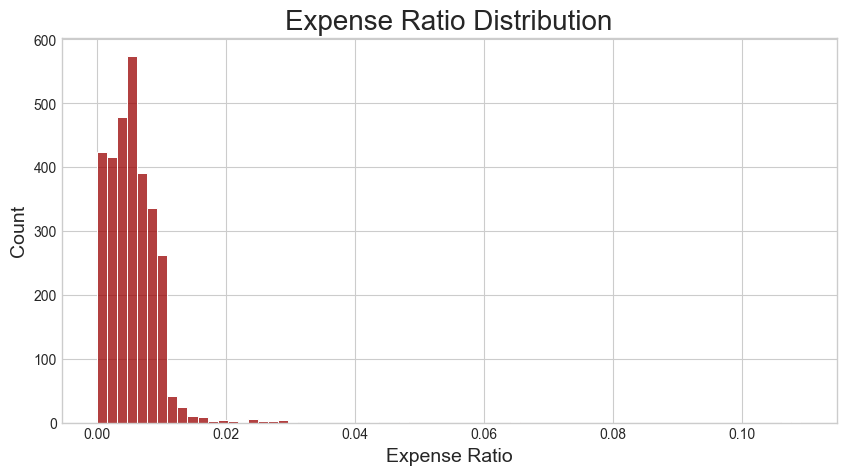

In [7]:
# g = sns.FacetGrid(data, col="Asset Class", hue = "Asset Class", col_wrap=5, sharey = False, sharex = False)
# g.map(sns.histplot, "Expense Ratio", bins = 15);

sns.histplot(
    data = etfdata,
    x = "Expense Ratio",
    bins = 70
);
plt.title(f"Expense Ratio Distribution");

In [39]:
etfdata.describe()

,Expense Ratio
count,2994.000000
mean,0.005513
std,0.004617
min,0.000000
25%,0.002900
50%,0.005000
75%,0.007500
max,0.109200


In [40]:
# cond = (etfdata["Expense Ratio"] <= 0.0075) & (etfdata["Avg. Daily Share Volume (3mo)"] >= 25000)
cond = (etfdata["Expense Ratio"] <= 0.0075)

data = etfdata.loc[cond].reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         2263 non-null   object 
 1   ETF Name       2263 non-null   object 
 2   Asset Class    2263 non-null   object 
 3   Expense Ratio  2263 non-null   float64
 4   region         2263 non-null   object 
dtypes: float64(1), object(4)
memory usage: 88.5+ KB


# Get Returns

In [41]:
with open("Data/Benchmarks.json", "r") as openfile:
    # Reading from json file
    nord_portfolios = json.load(openfile)
    
nord_symbols = nord_portfolios.get("nord_5").get("symbols")
nord_names = nord_portfolios.get("nord_5").get("names")

In [42]:
# nord_etfs = {
#     'DB Xtrackers II Eurozone Government Bond UCITS': 'DBXN.DE',    # XETRA Delayed Price. Currency in EUR
#     'iShares Core MSCI World UCITS': 'SWDA.MI',   # Milan Delayed Price. Currency in EUR
#     'DB Xtrackers II EUR Corporate Bond UCITS': 'XBLC.MI',   # Milan Delayed Price. Currency in EUR
#     'iShares Core S&P 500 UCITS': 'CSPX.L',  # LSE Delayed Price. Currency in USD
#     'iShares Core Euro STOXX 50 UCITS': 'SXRT.DE',   # XETRA Delayed Price. Currency in EUR
#     'iShares Core MSCI EM IMI UCITS': 'EIMI.L',   # LSE Delayed Price. Currency in USD
#     'iShares Core MSCI Japan IMI UCITS': 'IJPA.L'  # LSE Delayed Price. Currency in USD
# }

In [43]:
from Code.functions import get_weekly_returns

start_date = "2015-01-01"
end_date = "2022-12-01"
    
etfreturns_data = get_weekly_returns(
    start_date = start_date,
    end_date = end_date,
    symbols = data["Symbol"].to_list() + nord_symbols
)

etfreturns_data.shape

(412, 882)

# Get Volume

In [44]:
from Code.functions import get_daily_volume

etfvolume_data = get_daily_volume(
    start_date = start_date,
    end_date = end_date,
    symbols = data["Symbol"][data["Symbol"].isin(etfreturns_data.columns)].to_list()
)

etfvolume_data.shape

(1994, 875)

In [45]:
tmp = pd.DataFrame(index = np.arange(0,100, 5))
mean_daily_volume = etfvolume_data.mean()
mean_daily_volume.name = "Avg. Daily Volume"
n = []
for p in tmp.index:
    
    count = (mean_daily_volume >= np.percentile(mean_daily_volume.values, p)).sum()
    n.append(count)
tmp["n"] = n

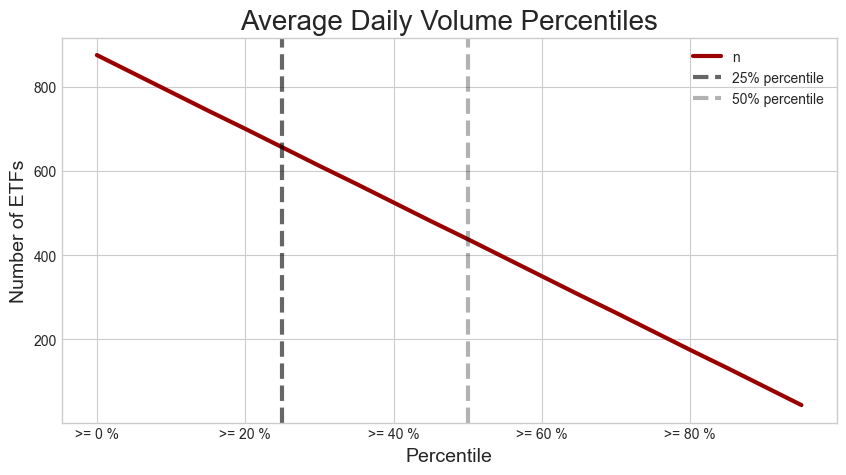

In [46]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()
tmp.plot(ax=ax)
plt.axvline(25, color = "black", linestyle = "--", label = "25% percentile", alpha = 0.6)
plt.axvline(50, color = "black", linestyle = "--", label = "50% percentile", alpha = 0.3)
plt.legend()
plt.xlabel("Percentile")
plt.ylabel("Number of ETFs")
plt.title("Average Daily Volume Percentiles")

tick_loc = ax.get_xticks()
tick_labels = [f">= {tick:0.0f} %"  for tick in tick_loc]
ax.xaxis.set_major_locator(mticker.FixedLocator(tick_loc))
ax.set_xticklabels(tick_labels)

plt.show();

In [47]:
p25 = np.percentile(mean_daily_volume, 25)
p50 = np.percentile(mean_daily_volume, 50)
print(f"25% percentile of the average daily volume: {p25:0.2f}, with {tmp.loc[25][0]} ETFs")
print(f"50% percentile of the average daily volume: {p50:0.2f}, with {tmp.loc[50][0]} ETFs")

25% percentile of the average daily volume: 28818.23, with 656 ETFs
50% percentile of the average daily volume: 113894.53, with 438 ETFs


In [48]:
filtered_symbols = mean_daily_volume[mean_daily_volume > p25].index.tolist()

etfreturns_filtered = etfreturns_data[filtered_symbols + nord_symbols]
etfreturns_filtered.shape

(412, 663)

In [49]:
etfdata_filtered = etfdata[etfdata["Symbol"].isin(etfreturns_filtered.columns)].reset_index(drop = True)
etfdata_filtered = pd.merge(left = etfdata_filtered, right = mean_daily_volume, left_on = "Symbol", right_index = True)
etfdata_filtered.shape

(656, 6)

In [50]:
# sns.scatterplot(
#     data = data,
#     x = "std returns",
#     y = "mean returns",
#     hue = "Asset Class"
# );

# Store Data

In [51]:

etf_symbols = {
    "universe": etfdata_filtered["Symbol"].to_list(),
    "nord": nord_symbols
}

etf_names = {
    "universe": etfdata_filtered["ETF Name"].to_list(),
    "nord": nord_names
}

etf_dict = {
    "symbols":etf_symbols,
    "names":etf_names
}


In [57]:
# # # crate dict where symbols are keys
# # etfdata_filtered_dict = etfdata_filtered.set_index("Symbol").to_dict(orient="index")

# # # write out to files
# # with open("Data/Data_ETFs.json", "w") as outfile:
# #     # Write to json file
# #     json.dump(etfdata_filtered_dict, outfile)
    
# etfdata_filtered.to_csv("Data/Data_ETFs_Info.csv", index=False)
    
# # to json
# with open("Data/Data_ETFs_Names.json", "w") as outfile:
#     # Write to json file
#     json.dump(etf_dict, outfile)

# etfreturns_filtered.to_parquet("Data/Data_ETFs_Returns.gzip", compression='gzip')